# Get familiar with CNNs in Keras
*Following [this](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5) tutorial, get acquainted with the basic code to build a convolutional neural network from scratch.*

In [19]:
import pandas as pd

In [23]:
pd.options.display.max_rows = None

In [24]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
(X_train_alt, y_train_alt), (X_test_alt, y_test_alt) = mnist.load_data()

In [27]:
X_train_alt[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

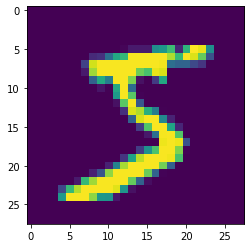

In [28]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [29]:
#check image shape
X_train[0].shape

(28, 28)

In [30]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [31]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten


In [33]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [34]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2484 - accuracy: 0.9493 - val_loss: 0.1137 - val_accuracy: 0.9658
Epoch 2/3
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0857 - val_accuracy: 0.9733
Epoch 3/3
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.0974 - val_accuracy: 0.9733


In [36]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[3.1611910e-06, 2.2417540e-16, 2.6301195e-09, 1.9155175e-09,
        2.3214793e-13, 9.3730655e-13, 4.6396098e-15, 9.9999666e-01,
        3.2318457e-09, 1.0612374e-07],
       [3.0225711e-11, 8.4045904e-12, 1.0000000e+00, 4.0061639e-12,
        2.4798401e-14, 2.1755088e-17, 1.9588000e-09, 1.0216573e-17,
        4.3383873e-11, 2.2460488e-17],
       [8.1152244e-08, 9.9938583e-01, 4.6294581e-06, 3.2983234e-08,
        5.7066011e-04, 3.4180080e-06, 1.1969108e-05, 8.8651854e-07,
        2.2573744e-05, 2.7623200e-08],
       [9.9997747e-01, 4.6015618e-12, 8.8507996e-08, 1.1118371e-13,
        1.5390440e-09, 8.1259353e-11, 1.4518003e-05, 1.2919537e-07,
        5.3980365e-08, 7.7942395e-06]], dtype=float32)

In [37]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)